In [1]:
#relevant packages
import numpy as np
from scipy.optimize import *
import matplotlib.pyplot as plt
from matplotlib import *
from mpl_toolkits import mplot3d

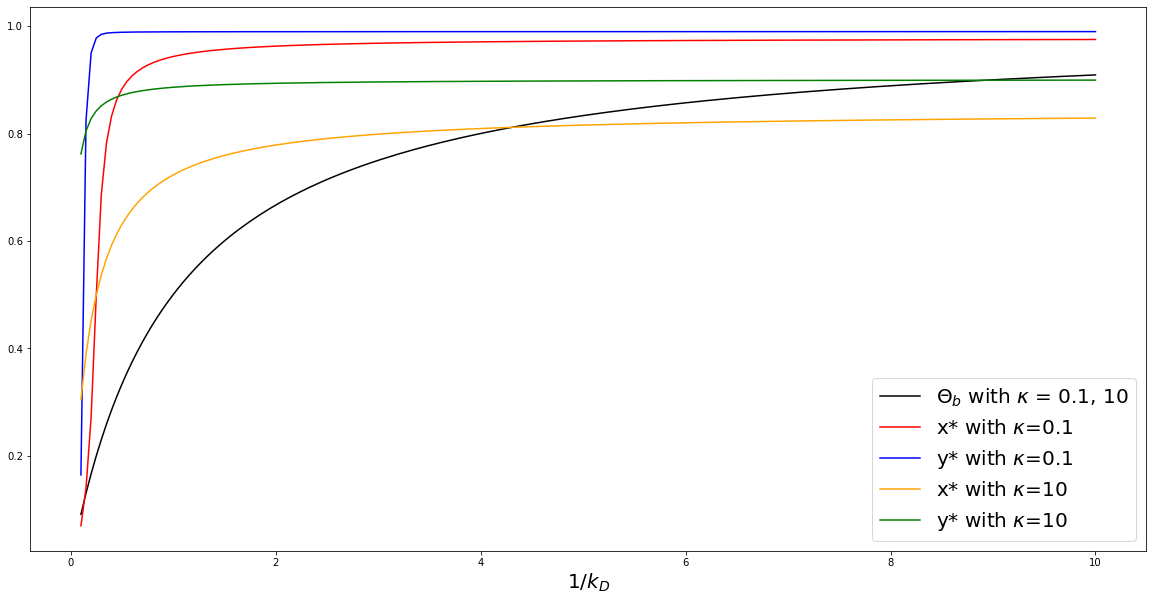

In [2]:
#PROBLEM 1, part b

#constants as defined in the problem  
kappa = 0.1
kappa2 = 10

m=200   #tightness of mesh

kdInv=np.linspace(0.1,10,m)   #kdInv is 1/kd, our nondimensional input

thetaB=kdInv/(1+kdInv)  # only 1 value for theta B as there is no kappa dependance

xStar=np.zeros(m) # will be xStar with kappa=0.1
xStar2=np.zeros(m) # will be xStar with kappa=10
for i in range(m):
    
    def xEquation(p):
        x=p[0]
        x2=p[1]
        
        F=np.empty(2)
        F[0]=5*thetaB[i]*(1-x)/(kappa+1-x)-x/(kappa+x)
        F[1]=5*thetaB[i]*(1-x2)/(kappa2+1-x2)-x2/(kappa2+x2)
        return F
    
    xStar[i],xStar2[i]=fsolve(xEquation,np.array([1,1]))

    
yStar=np.zeros(m) # ystar solving
yStar2=np.zeros(m)
for j in range(m):
    
    def yEquation(p):
        y=p[0]
        y2=p[1]
        
        F=np.empty(2)
        F[0]=10*xStar[j]*(1-y)/(kappa+1-y)-y/(kappa+y)
        F[1]=10*xStar2[j]*(1-y2)/(kappa2+1-y2)-y2/(kappa2+y2)
        return F
    yStar[j],yStar2[j]=fsolve(yEquation,np.array([1,1]))


        
plt.rcParams["figure.figsize"] = (20,10)

plt.xlabel('$1/k_D$',fontsize=20)
plt.ylabel('',fontsize=20)
        
plt.plot(kdInv,thetaB,color='black',label='$\Theta _b$ with $\kappa$ = 0.1, 10');
plt.plot(kdInv,xStar,color='red',label='x* with $\kappa$=0.1');
plt.plot(kdInv,yStar,color='blue',label='y* with $\kappa$=0.1');
plt.plot(kdInv,xStar2,color='orange',label='x* with $\kappa$=10');
plt.plot(kdInv,yStar2,color='green',label='y* with $\kappa$=10');
plt.legend(loc='lower right',fontsize=20);

In [ ]:
# part c

#hill Func defines the type of function we fit our previous curves to where param is an array of values to vary 
def hillFunc(param,dataIn,dataOut):
    
    return value
    

firstTry = np.ones(2) #initial guess for parameters

In [4]:
#PROBLEM 2, part a

#constants as defined in problem
Vmax1 = 5; Vmax2=5; Vmax3=1; Vmax4=1; KS1=5; KS2=5; KS3=5; KS4=5; KI1=1; KI2=1; Stot=100;

#set up system of equations ignoring inhibitor
def equations(p):
    a=p[0]
    b=p[1]
    c=p[2]
    
    F = np.empty((3))
    F[0]=(Vmax1*a)/(KS1+a)-(Vmax3*b)/(KS3+b)
    F[1]=(Vmax2*a)/(KS2+a)-(Vmax4*c)/(KS4+c)
    F[2]=Stot-a-b-c
    
    return F

#solve system numerically
guess=np.array([1,1,1])
a,b,c=fsolve(equations,[1,1,1])
print(a,b,c)

1.1097274282645377 49.445136285867754 49.445136285867704


In [19]:
#part b 
#solve system with varying concentrations of inhibitors I1, I2

n=200  #tightness of mesh  
#note anything n>200 is a large mesh with slower run time.  Most testing was done on a faster n=100 system

I1 = np.logspace(-2.0,3.0,num=n) #vary concentrations logarithmically to have logical distribution of inhibitors
I2 = np.logspace(-2.0,3.0,num=n)
a=np.zeros((n,n)) #initialize solutions
b=np.zeros((n,n))
c=np.zeros((n,n))
guess=np.array([1,1,1]) #arbitrary initial guess

for i in range(n):
    #restore initial guess when looping for large discontinuities
    guess=np.array([1,1,1])
    for j in range(n):
        
        #pass local system to account for varying inhibitor
        #function defined locally to be compatible with fsolve system, but kinda slow :(
        def newSystem(p):
                
            a=p[0]
            b=p[1]
            c=p[2]
            i1=I1[i] #call I1 concentration to try
            i2=I2[j] #call I2 concentration to try
            
            F = np.empty((3)) # F is returned system of equations, which are all put in form equation=0
            F[0]=(Vmax1*a)/((KS1+a)*(1+(i1/KI1)))-(Vmax3*b)/(KS3+b)
            F[1]=(Vmax2*a)/((KS2+a)*(1+(i2/KI2)))-(Vmax4*c)/(KS4+c)
            F[2]=Stot-a-b-c
            return F
    
        a[i,j],b[i,j],c[i,j]=fsolve(newSystem,guess)
        guess[0]=a[i,j]  #updated guess is previous value helps convergence (assumes smooth function)
        guess[1]=b[i,j]
        guess[2]=c[i,j]


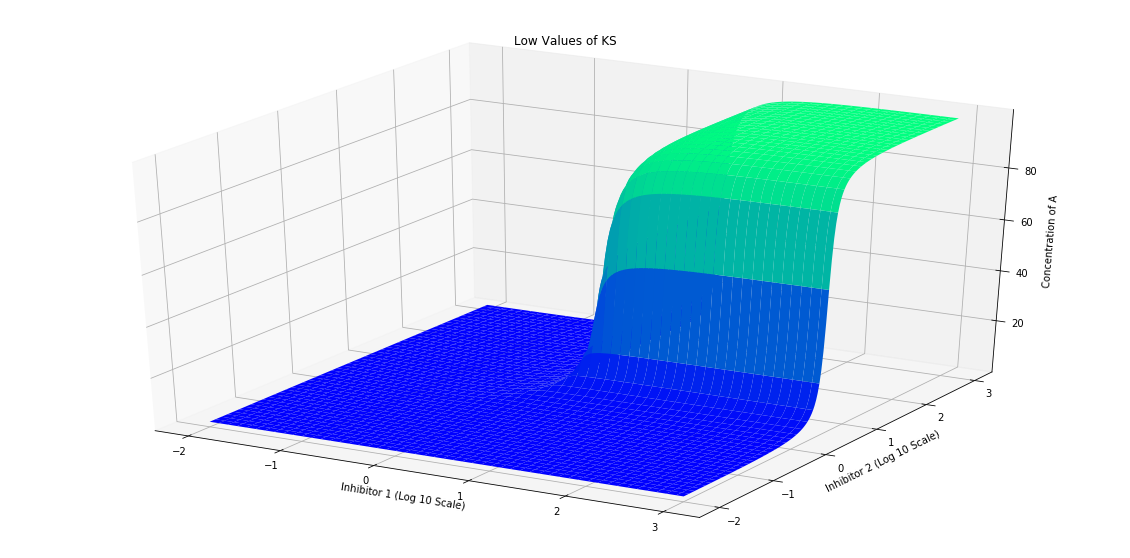

In [9]:
#plot 3D

#logscale
fig = plt.figure()
ax=plt.axes(projection="3d")

X, Y = np.meshgrid(I1,I2)
ax.plot_surface(np.log10(X), np.log10(Y), a, cmap='winter')
ax.set_xlabel('Inhibitor 1 (Log 10 Scale)')
ax.set_ylabel('Inhibitor 2 (Log 10 Scale)')
ax.set_zlabel('Concentration of A')
ax.set_title('Low Values of KS')
plt.show()


2C:  

When I1 and I2 are high the A $\rightarrow$ B and A $\rightarrow$C reactions are completely inhibited. However, the B $\rightarrow$ A and C $\rightarrow$ A reactions are still able to proceed. Thus, when our inputs, I1 and I2, are large our output, A, is large as well as the futile cycle is broken, and A set as the default state of the compounds in the system. When either I1 or I2 are not large the B futile cycle or C futile cycle are enabled, respectively. Consequently, the concentration of A is reduced if either I1 or I2 is not large.


Thus, if we design a truth table for the two inhibitors, categorizing low concentration as 0 and high concentration as 1 we obtain the following:

                                           I1      I2        A
                                           0       0         0
                                           0       1         0
                                           1       0         0
                                           1       1         1
                                           
Thus, the system clearly behaves as an 'And' gate.

In [7]:
#part d
#redefine constants
KS1new=35
KS2new=35
KS3new=35
KS4new=35

aNew=np.zeros((n,n))
bNew=np.zeros((n,n))
cNew=np.zeros((n,n))

for i in range(n):
    guess=np.array([1,1,1])
    for j in range(n):
        
        #pass local system to account for varying inhibitor
        def newSystem(p):
                
            a=p[0]
            b=p[1]
            c=p[2]
            i1=I1[i]
            i2=I2[j]
            
            F = np.empty((3))
            F[0]=(Vmax1*a)/((KS1new+a)*(1+(i1/KI1)))-(Vmax3*b)/(KS3new+b)
            F[1]=(Vmax2*a)/((KS2new+a)*(1+(i2/KI2)))-(Vmax4*c)/(KS4new+c)
            F[2]=Stot-a-b-c
            return F
    
        aNew[i,j],bNew[i,j],cNew[i,j]=fsolve(newSystem,guess)
        guess[0]=a[i,j]  #update guess (assuming smooth function)
        guess[1]=b[i,j]
        guess[2]=c[i,j]


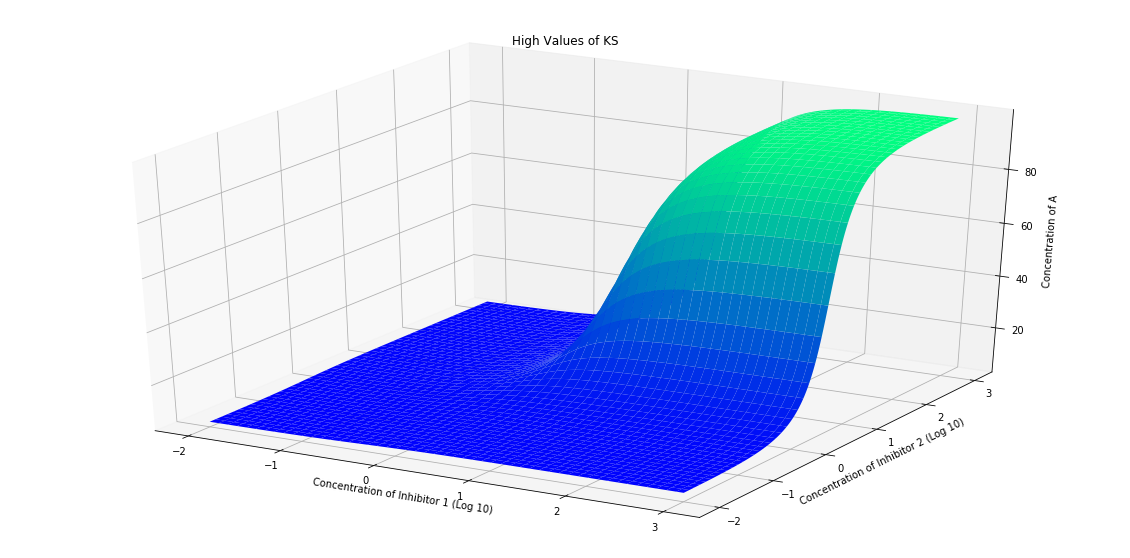

In [12]:
#plot 3D
fig = plt.figure()
ax=plt.axes(projection="3d")

X, Y = np.meshgrid(I1,I2)
ax.plot_surface(np.log10(X), np.log10(Y), aNew, cmap='winter')
ax.set_xlabel('Concentration of Inhibitor 1 (Log 10)')
ax.set_ylabel('Concentration of Inhibitor 2 (Log 10)')
ax.set_zlabel('Concentration of A')
ax.set_title('High Values of KS')


plt.show()

As you can see, the increasing slope from low to high concentration of A is much shallower, meaning the gate is less sensitive, and can yield more intermediate values.  Thus, the gate has a larger 'intermediate' range and could be considered 'fuzzy'.  

Problem 2E:

Goldbeter aand Goshland (1981) demonstrate the importance of zero-order ultrasensitivity for tuning sharp and sudden responses in cell signaling.  With highly sensitive, low values for $\kappa$, we find that there is a sharp, nearly binary response between which species is dominant in the system.  With lower and less sensitive systems ( higher values for $\kappa$) we find less of a 'logical gate like' response (as logical gates only operate in boolean/binary responses) as the response is no longer discretized into two output ranges, but instead expresses many intermediate values.

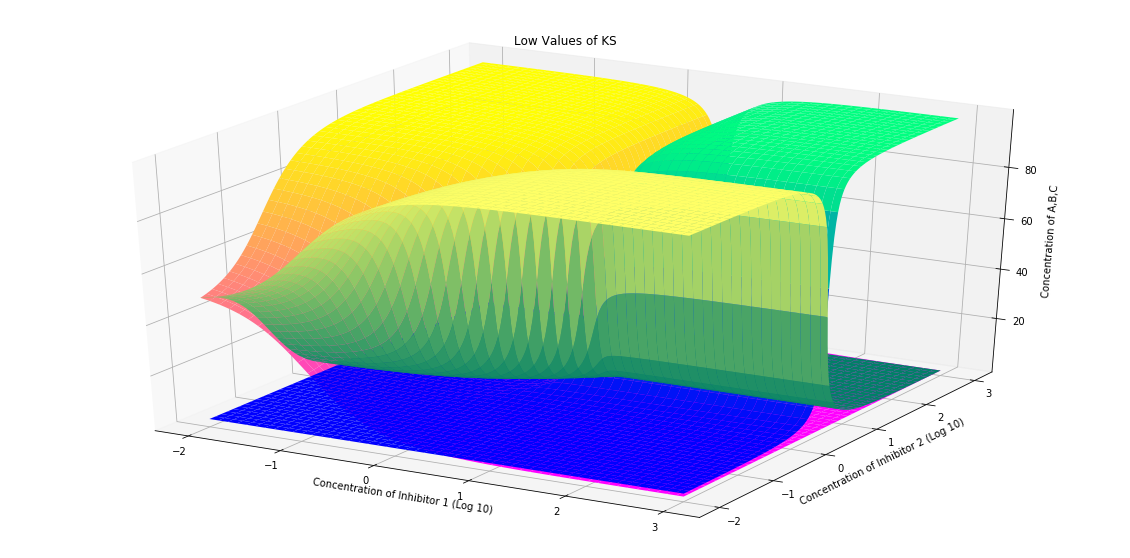

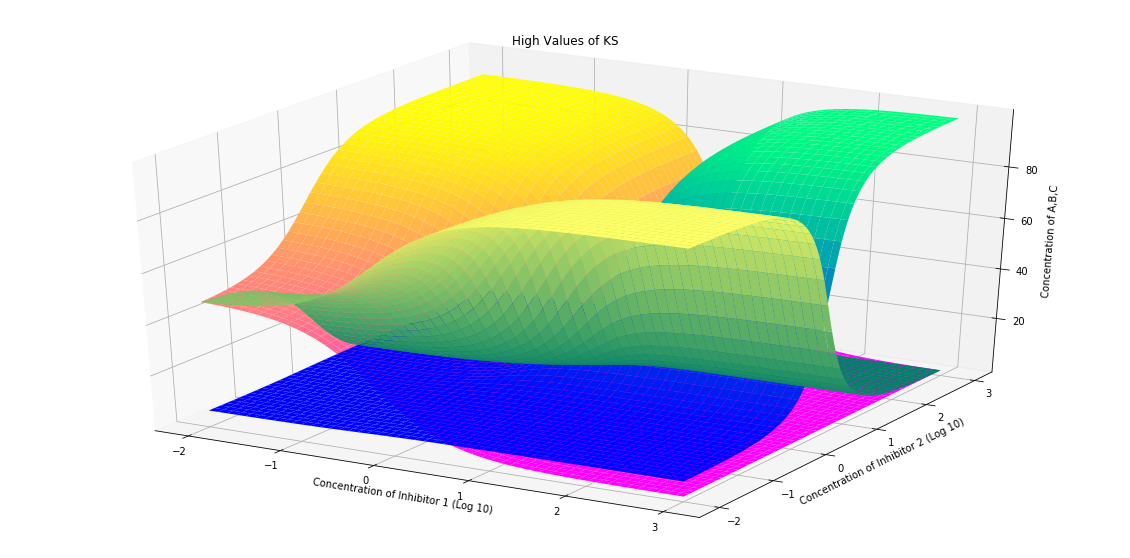

In [29]:
# Interesting Figures:
#because it is interesting to look at, we plot concentrations of a, b, c for both systems

fig = plt.figure()
ax=plt.axes(projection="3d")
X, Y = np.meshgrid(I1,I2)
ax.plot_surface(np.log10(X), np.log10(Y), a, cmap='winter',label='Species A')
ax.plot_surface(np.log10(X), np.log10(Y), b, cmap='summer', label='Species B')
ax.plot_surface(np.log10(X), np.log10(Y), c, cmap='spring', label='Species C')
ax.set_xlabel('Concentration of Inhibitor 1 (Log 10)')
ax.set_ylabel('Concentration of Inhibitor 2 (Log 10)')
ax.set_zlabel('Concentration of A,B,C')
ax.set_title('Low Values of KS')
plt.show()

fig = plt.figure()
ax=plt.axes(projection="3d")
X, Y = np.meshgrid(I1,I2)
ax.plot_surface(np.log10(X), np.log10(Y), aNew, cmap='winter')
ax.plot_surface(np.log10(X), np.log10(Y), bNew, cmap='summer')
ax.plot_surface(np.log10(X), np.log10(Y), cNew, cmap='spring')
ax.set_xlabel('Concentration of Inhibitor 1 (Log 10)')
ax.set_ylabel('Concentration of Inhibitor 2 (Log 10)')
ax.set_zlabel('Concentration of A,B,C')
ax.set_title('High Values of KS')
plt.show()

In the figures above, species A is in Blue/green, species B is in Green/yellow, and species C is in Pink/yellow

Thus, we can see with low concentration of both inhibitors, we have a mix of Species B and C.  With high Inhibitor 1 and low Inhibitor 2 we see a system with mostly species B.  In the case of low Inhibitor 1 and high Inhibitor 2, we see a system with mostly Species C.  With high concentration of both inhibitors, Species A is in high concentration as previously shown.  In all cases, increasing the value of $\kappa$ causes a more 'fuzzy' transition between species while low values of $\kappa$ have a much more sensitive, sudden change in dominant species.